#  Colume 社会科学の違いを「測る」　- Linked Open Dataを使ってテキスト分析

DBpedia.orgのSPARQL Endpointにアクセスして、日本の経済学者と経営学者の名前と概要についてまとめて取得します。


In [2]:
!pip install SPARQLWrapper

  Using cached SPARQLWrapper-2.0.0-py3-none-any.whl (28 kB)
  Obtaining dependency information for rdflib>=6.1.1 from https://files.pythonhosted.org/packages/d4/b0/7b7d8b5b0d01f1a0b12cc2e5038a868ef3a15825731b8a0d776cf47566c0/rdflib-7.0.0-py3-none-any.whl.metadata
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
   ---------------------------------------- 0.0/531.9 kB ? eta -:--:--
   ------------------------------------- - 512.0/531.9 kB 10.7 MB/s eta 0:00:01
   --------------------------------------- 531.9/531.9 kB 11.1 MB/s eta 0:00:00


In [3]:
from SPARQLWrapper import SPARQLWrapper

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#日本の経済学者の情報をまとめて取得する
sparql2 = SPARQLWrapper(endpoint='http://ja.dbpedia.org/sparql', returnFormat='json')
sparql2.setQuery("""
PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>

select distinct ?name ?abstract where {
    ?company <http://dbpedia.org/ontology/wikiPageWikiLink> <http://ja.dbpedia.org/resource/Category:日本の経済学者> .
    ?company rdfs:label ?name .
    ?company <http://dbpedia.org/ontology/abstract> ?abstract .
}
""")
results = []
results2 = sparql2.query().convert()

# このままresult2をprilltするとjson形式のデータで出力されるため、nameおよび bstractのvalueのみ取り出すことにしましょう。
# 結果を整形
for result in results2["results"]["bindings"]:
#    print("経済",";",result["name"]["value"],";",result["abstract"]["value"])
    results.append(result["abstract"]["value"])
# これにより,Wikipedia(DBPedia.org)に掲載された経済学者の名前およびその概要に関する情報を一括して取得することが出来ました
#このリストをtextに変換。リスト要素の区切りは改行とする。
text = '\n'.join(results)

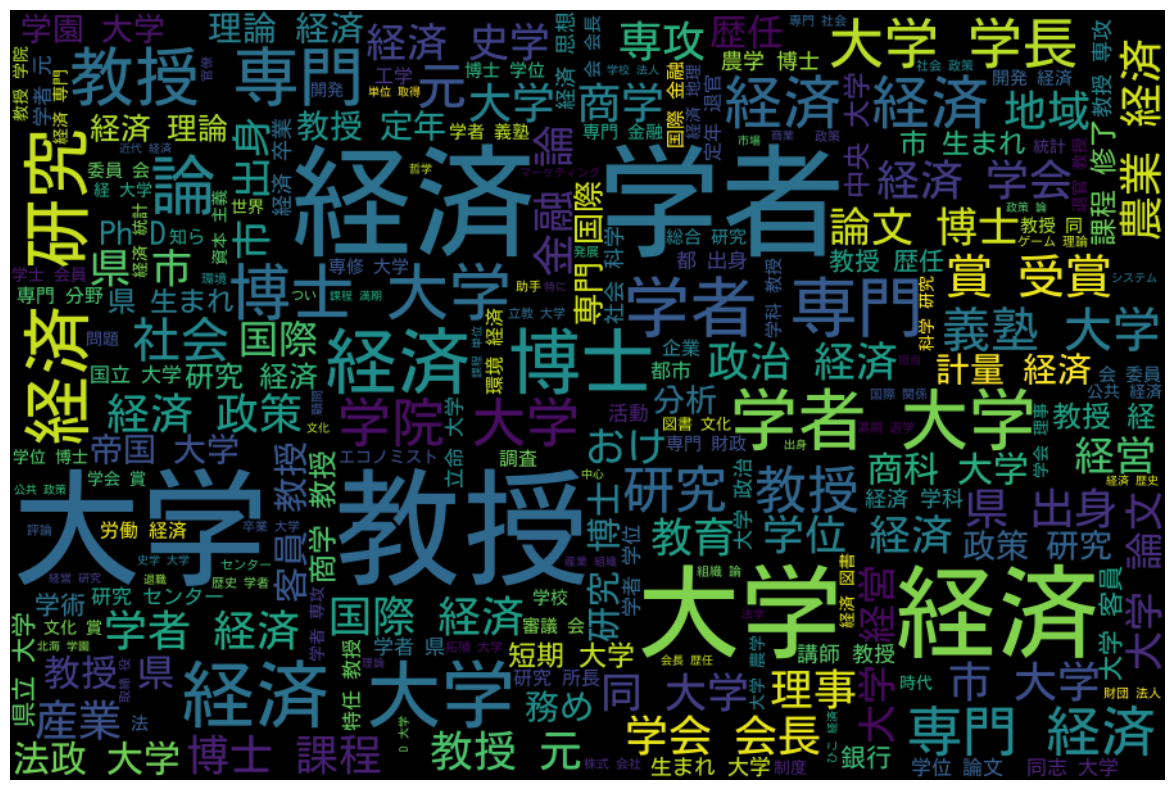

In [4]:
# 上記テキストデータから，WordCloudライブラリでワードクラウドを作成

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import MeCab
import re

parse = MeCab.Tagger().parse(text)
lines = parse.split("\n")
items =  (re.split('[\t,]', line) for line in lines)

words = []
i = 0
for item in items:
    if item[0] == 'EOS' or item[0] == '':
        pass
    elif item[4] in ["名詞-普通名詞-一般", "名詞-普通名詞-サ変可能", "形容詞-一般", "動詞-一般", "副詞"]:
        words.append(item[0])
words = ' '.join(words)


# 日本語フォントを指定
font_path = "Kosugi-Regular.ttf"

stopwords = [u"あり",u"おり",u"いる",u"なら",u"する",u"ある",u"ない",u"こと",u"なっ",u"でき",u"できる",u"これ",u"もの",u"よう",u"なる",u"はず",u"なり",u"それ",u"れる",u"られる",u"ここ",u"ため",u""]

wordcloud = WordCloud(max_font_size=100, width=900, height=600, font_path=font_path, stopwords=set(stopwords)).generate(words)

wordcloud.to_file('20221213_economist.png')
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

#plt.savefig("result/SR.png")
plt.show()